# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Deb St. Cyr
Link to GitHub: https://github.com/14dstcyr/D7-Applying-Course-Skills/tree/main

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [3]:
import json
import pickle

import requests
import spacy

print('All the requirements are installed')
!pip list

All the requirements are installed
Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_cor

## Question 1

Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [ ]:
!pip install  requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl (102 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests
import json
import os
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob


result = json.loads(requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run').text)

# Create a folder and file path
folder_name = 'song_lyrics'
file_name = 'Band  On The Run.json'

# If folder does not exist, create one
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Create path to file
file_path = os.path.join(folder_name, file_name)

# Write the JSON file result
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(result, file, ensure_ascii=False, indent=4)
    
print(f"Lyrics saved to{file_path}")

Lyrics saved tosong_lyrics\Band  On The Run.json


## Question 2

Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [10]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import requests
import json

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to pipeline
nlp.add_pipe("spacytextblob")

# Get the lyrics from the API and process them
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = json.loads(response.text)

# Extract lyrics text from the API response
lyrics = result.get("lyrics", "")  # Fallback to an empty string if 'lyrics' key is missing

if lyrics:
    # Process the lyrics with spaCy
    doc = nlp(lyrics)

    # Sentiment Analysis
    polarity_score = doc._.blob.polarity

    # Print polarity score with an appropriate label
    print("Polarity Score:", polarity_score)

    if polarity_score > 0:
        print("The score is closer to 1. The lyrics have a more positive sentiment.")
    elif polarity_score < 0:
        print("The score is closer to -1. The lyrics have a more negative sentiment.")
    else:
        print("The score is 0. The lyrics have a neutral sentiment.")

    # Count the number of sentences in the lyrics
    num_sentences = len(list(doc.sents))
    print("Number of Sentences:", num_sentences)

else:
    print("Could not retrieve lyrics from the API.")

Polarity Score: 0.18055555555555558
The score is closer to 1. The lyrics have a more positive sentiment.
Number of Sentences: 14


## Question 3

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [ ]:
import requests
import spacy
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Ensure we have the lyrics text
if not lyrics_text:
    print("Failed to retrieve lyrics from the API.")
else:
    # Load spaCy pipeline
    nlp = spacy.load("en_core_web_sm")

    # Process the lyrics text
    article = nlp(lyrics_text)

    # Filter out punctuation, whitespace, and stopwords
    tokens = [
        token.text.lower() for token in article 
        if not token.is_punct and not token.is_stop and not token.is_space
    ]

    # Count the 5 most common tokens
    token_counts = Counter(tokens)
    common_tokens = token_counts.most_common(5)

    # Print the 5 most common tokens and their frequencies
    print("5 Most Common Tokens in the Lyrics:")
    for token, freq in common_tokens:
        print(f"The token '{token}' has a frequency of {freq}")


5 Most Common Tokens in the Lyrics:
The token 'run' has a frequency of 20
The token 'band' has a frequency of 19
The token 'searching' has a frequency of 3
The token 'inside' has a frequency of 2
The token 'seeing' has a frequency of 2


## Question 4

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [12]:
import requests
import spacy
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Make sure the text lyrics are there
if not lyrics_text:
    print("Failed to retrieve lyrics from API")
else:
    # Load the spaCy pipeline
    nlp = spacy.load("en_core_web_sm")
    
    # Process the article text
    doc = nlp(lyrics_text)
    
    # Extract lemmas, excluding stopwords, punctuation, and whitespace
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
    
    # Count the lemmas
    lemma_counts = Counter(lemmas)
    
    # Get the 5 most common lemmas
    common_lemmas = lemma_counts.most_common(5)
    
    # Print the 5 most common lemmas with their frequencies
    print("5 Most Common Lemmas in the Article:")
    for lemma, freq in common_lemmas:
        print(f"The lemma '{lemma}' has a frequency of {freq}")

5 Most Common Lemmas in the Article:
The lemma 'run' has a frequency of 20
The lemma 'band' has a frequency of 19
The lemma 'search' has a frequency of 4
The lemma 'inside' has a frequency of 2
The lemma 'see' has a frequency of 2


## Question 5

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

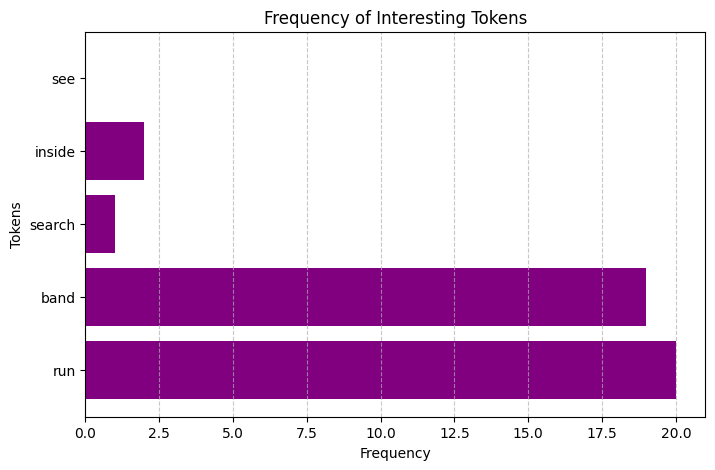

In [ ]:
import requests
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Grab lyrics from the API
response = requests.get('https://api.lyrics.ovh/v1/Paul McCartney/Band On The Run')
result = response.json()  # Parse the JSON response
lyrics_text = result.get("lyrics", "")  # Get the lyrics from the JSON response

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(lyrics_text)

# Define interesting tokens
interesting_tokens = ["run", "band", "search", "inside", "see"]

# Count frequency of interesting tokens in the text
tokens = [token.text.lower() for token in doc if not token.is_space and not token.is_punct]
token_counts = Counter(tokens)

# Filter counts to include only interesting tokens
filtered_counts = {token: token_counts[token] for token in interesting_tokens}

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(list(filtered_counts.keys()), list(filtered_counts.values()), color='purple')
plt.title("Frequency of Interesting Tokens")
plt.xlabel("Frequency")
plt.ylabel("Tokens")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# The frequency of the words "See" is 0.0, "inside" is about 2, "search" is about 1, " band" is around 18.8, and "run" is approximately 20.

## Question 6

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 7

Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Question 8

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 9

Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 10

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 11

Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 12

Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

## Question 13

Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?